Marçal Henrique Moreira  
Discente em Engenharia de Computação pelo IFMG - Campus Bambuí  
GitHub: https://www.github.com/marcalhenrique
----

-----------------------

<h1> Detecção de Texto em Placas de Véiculos </h1>

In [5]:
# Importando as bibliotecas

import cv2 # OpenCV
import pytesseract as tess # OCR
import pandas as pd # Dataframe
from PIL import Image # Manipulação de imagens


A célula anterior contém as importações das bibliotecas necessárias para o desenvolvimento do projeto. Como está sendo utilizado o Jupyter Notebook no VS Code, é necessário utilizar a biblioteca PIL para printar as imagens no notebook.  

# 1. PSM (Page Segmentation Mode)
O PSM é um parâmetro que define o modo de segmentação da página. Abaixo estão listados os modos de segmentação:

In [4]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


# 2. Imagem de Teste
Na célula abaixo é definida uma imagem de teste para a detecção de textos. A imagem é carregada através da função `cv2.imread()` , é feita a conversão para o espaço de cores RGB através da função `cv2.cvtColor()`, essa conversão é feita pois ao ler uma imagem o OpenCV utiliza como padrão o esquema de cor BGR e é exibida através da função `display(Image.fromarray())` .  
A variável `config_tess` é utilizada para definir o modo de segmentação da página e o idioma da imagem.  
Utilizando a função `pytesseract.image_to_string()` é feita a detecção de textos na imagem de teste.

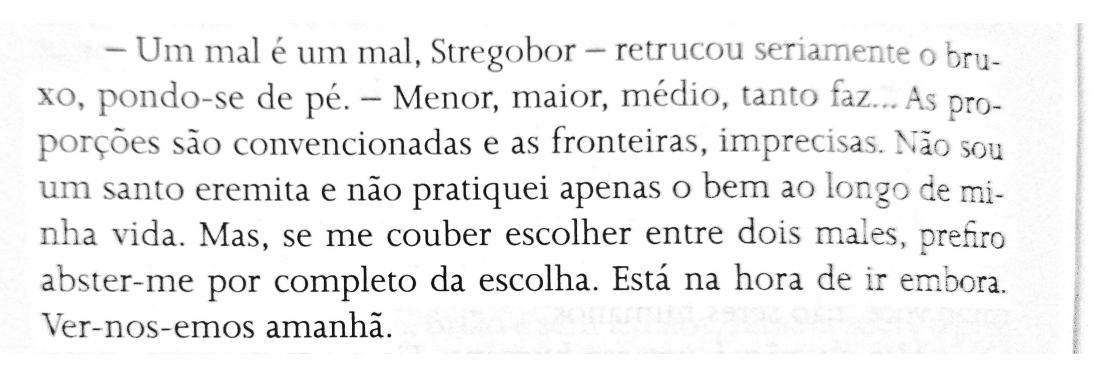

Texto da imagem: 

 — Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



In [9]:
imagem_teste = cv2.imread("imagens_curso/trecho_livro.png") # Carregando a imagem
imagem_teste = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB) # Convertendo de BGR para RGB
display(Image.fromarray(imagem_teste)) # Exibindo a imagem
#------------------------------------------------
# Definindo configurações do Tesseract
config_tess = '--tessdata-dir tessdata --psm 6' # Configurações do Tesseract

texto_teste = tess.image_to_string(imagem_teste, lang = 'por', config=config_tess) # Aplicando OCR
print("Texto da imagem: \n\n", texto_teste) # Exibindo o texto extraído

# 3. Placa de Véiculo
A célula abaixo carrega a primeira placa de véiculo e transforma a imagem em uma imagem em escala de cinza através da função `cv2.cvtColor()`.  
Por padrão o Tesseract se da melhor com imagens em escala de cinza, pois a imagem em escala de cinza possui apenas um canal de cor, enquanto a imagem colorida possui três canais de cor, diminuindo a quantidade de dados a serem processados.

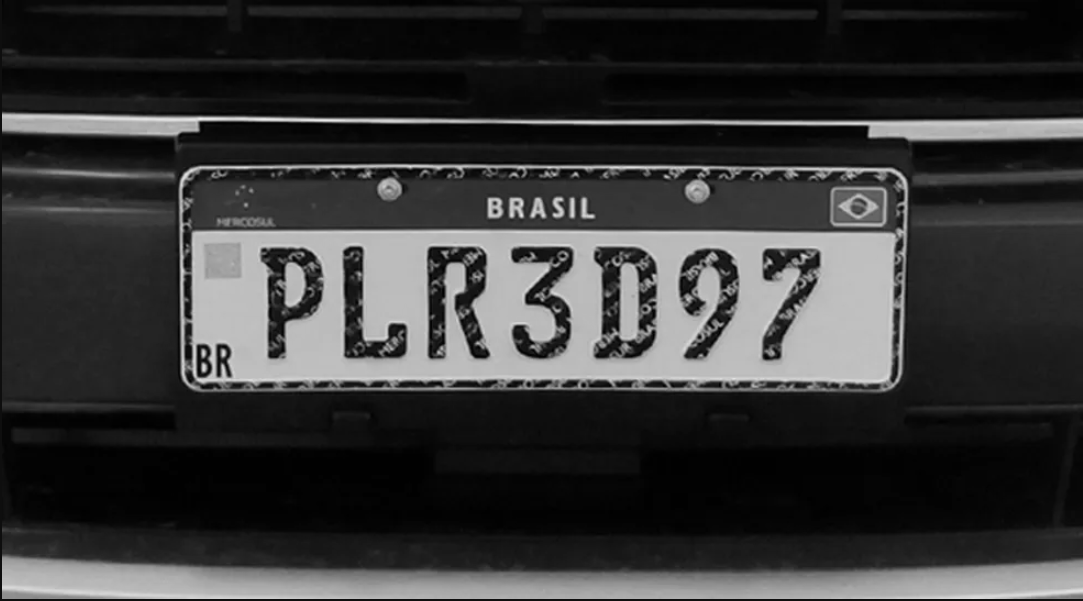

Texto da imagem: 

  



In [12]:
img = cv2.imread("imagens_curso/placa_carro1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img))
#------------------------------------------------
# Definindo configurações do Tesseract
config_tess = '--tessdata-dir tessdata' # Configurações do Tesseract
text = tess.image_to_string(img, lang = 'por', config=config_tess) # Aplicando OCR
print("Texto da imagem: \n\n", text) # Exibindo o texto extraído


# 4. Limiarização
Como observado na célula anterior, o Tesseract não foi capaz de detectar o texto da placa do véiculo.  
Para isso acontecer é necessário aplicar conceitos de processamento de imagens, como a limiarização.  
A limiarização é um processo em que se define um limite para separar os pixels da imagem em duas classes:
- Pixels com valores abaixo do limite.
- Pixels com valores acima do limite.

A limiarização é utilizada para binarizar uma imagem, ou seja, transformar uma imagem em preto e branco.  
Para cada pixel de uma imagem em escala de cinza, é atribuído um valor de 0 a 255, onde 0 é preto e 255 é branco.  
Para isso acontecer é necessário definir um valor de limiar, que é o valor que será utilizado para separar os pixels da imagem nas duas classes.  
Se o valor do pixel for menor que o valor do limiar, o pixel será convertido para preto, caso contrário, o pixel será convertido para branco.  
Mais informações sobre a limiarização podem ser encontradas em: [Limiarização - OpenCV](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

## 4.1. Limiarização Simples
Para aplicar a limiarização simples na imagem é utilizado a função `cv2.threshold()`, que recebe como parâmetros a imagem em escala de cinza, o valor do limiar e o valor máximo que será atribuído aos pixels.  
O método threshold retorna dois valores, o primeiro é o valor do limiar e o segundo é a imagem binarizada. De argumentos para o método treshold é passado a imagem, o valor do limiar, o valor máximo que será atribuído aos pixels e o tipo de limiarização.  

  

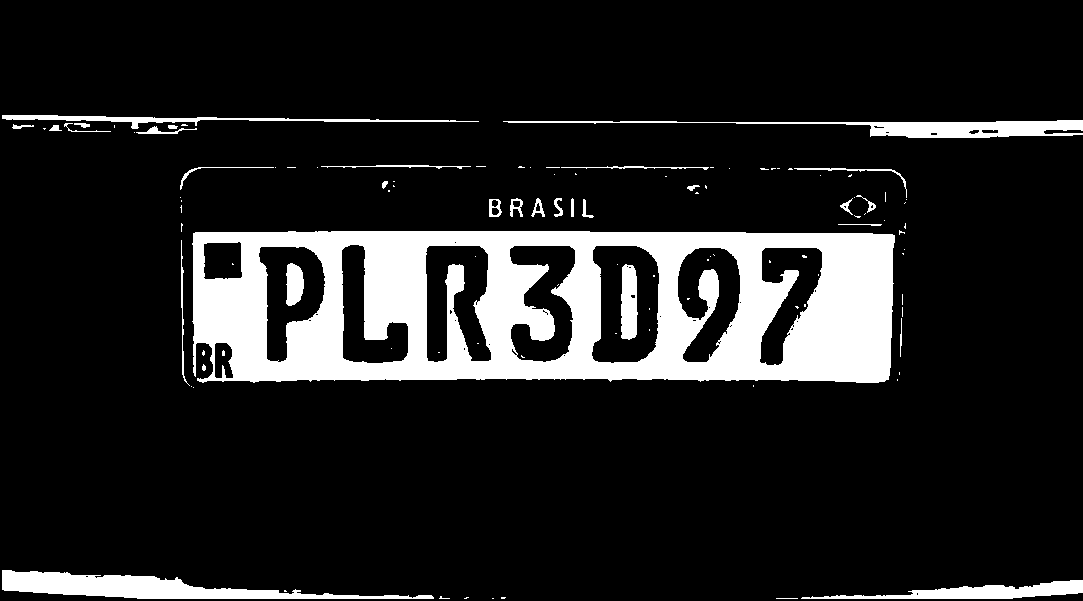

175.0


In [26]:
limiar = 175 # Limiar de binarização
limite_limiar = 255 # Limite do limiar de binarização
valor, limiar_simples = cv2.threshold(img, limiar, limite_limiar, cv2.THRESH_BINARY) # Binarização da imagem
display(Image.fromarray(limiar_simples)) # Exibindo a imagem binarizada

# 4.2. Limiarização Adaptativa
Na limiarização simples, o valor do limiar é definido manualmente, testando diferentes valores até que o texto seja detectado. Isso se torna inviável quando se trabalha com imagens de grande quantidade de pixels e uma grande quantidade de imagens.  
Limiarização adaptativa é um método de processamento de imagens em que o limiar é ajustado localmente em diferentes partes da imagem com base nas características da intensidade de pixel em cada região, em contraste com a limiarização global, em que o mesmo limiar é aplicado em toda a imagem.  
Para aplicar a limiarização adaptativa na imagem é utilizado a função `cv2.adaptativeThreshold()`, que toma três argumentos de entrada:
- **adaptativeMethod:** que determina como o limiar é calculado
- **blockSize:** que determina o tamanho da área do bairro que é usada para calcular o limiar para o pixel central.
- **C:** é uma constante subtraída da soma média ou ponderada dos pixels da vizinhança.

Para o adaptativeMethod existe dois métodos:
- **cv2.ADAPTIVE_THRESH_MEAN_C:** O limiar é calculado como a média da área do bairro menos a constante C.
- **cv2.ADAPTATIVE_THRESH_GAUSSIAN_C:** O limiar é calculado como a soma ponderada da vizinhança de pixels da área do bairro menos a constante C. A ponderação é feita com uma janela gaussiana.

